In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
# jobindex
df_raw = pd.read_csv('../data/jobindex_2021.csv', engine='python')
df_raw['date'] = pd.to_datetime(df_raw['date'])

df_raw['title'] = df_raw['title'].str.lower()

df_final = pd.DataFrame()

In [3]:
def analyse_title(job_title):
    
    job_title = job_title.lower()
    
    df_no_dup = df_raw.loc[df_raw['title'].str.contains(job_title, na=False)]

    # group counts by type
    df_count = df_no_dup[['title', 'date']].groupby('date').count().reset_index()

    # filter only from 2010 upwards
    df_filtered = df_count[(df_count['date'] >= '2017-01-01') & (df_count['date'] <= '2020-12-31')]

    # organize df_jobindex by quarter
    df_ji = df_filtered.resample('Q', convention='end', on='date').agg('sum').reset_index()
    
    df_ji.columns = ['date', 'count']

#     ax =df_ji.set_index('date').plot(figsize=(11,7))
#     ax.set_ylabel("number of jobs", fontsize=15)
#     ax.set_xlabel("year (by quarter)", fontsize=15)
#     ax.set_title(job_title)
    
#     print(df_ji)
    
    df_final[job_title] = df_ji['count']
    df_final['date'] = df_ji['date']

In [4]:
items = ['Pædagogmedhjælper', 'Pædagog', 'Murer', 'Produktionsmedarbejder', 'Bogholder', 'Kundeservicemedarbejder', 'Tandplejer', 'Tandlæge', 'Fysioterapeut', 'Medarbejder', 'Ledsager', 'Tjener', 'Salgsassistentelev', 'Afdelingsleder', 'Gravermedhjælper', 'Account Manager', 'Salgsassistent', 'Mekaniker', 'Lærer', 'Sygeplejerske', 'Administrativ medarbejder', 'Klinikassistent', 'Chauffør', 'Køkkenmedhjælper', 'Vikarvagt', 'Butiksassistent', 'Receptionist', 'Project Manager', 'Praktikant', 'Lagermedarbejder', 'Kontorassistent', 'Kommunikationspraktikant', 'Konsulent', 'Projektleder', 'Ungarbejder', 'Lægesekretær', 'Ernæringsassistent', 'Studiemedarbejder', 'sygeplejerske', 'Servicemedarbejder', 'Salgsleder', 'Økonomielev', 'Håndværker', 'Handicaphjælper', 'Souschef', 'Kontorelev', 'Kok', 'Tilkaldevikar', 'Serveringsmedarbejder', 'Ejendomsmægler', 'Instruktør', 'Salgskonsulent', 'Rengøringsassistent', 'Key Account Manager', 'Social- og sundhedshjælper', 'Elektriker', 'Servicemedarbejder under 18 år', 'lægesekretær', 'Tømrer', 'Salgselev', 'Studentermedhjælper', 'Leder', 'Social- og sundhedsassistent', 'Journalist', 'Læge', 'Elev', 'Studentermedarbejder', 'Sælger']

for item in items:
    analyse_title(item)

# analyse_title('Murer')

In [5]:
df_final.set_index('date', inplace=True)

df_final

,pædagogmedhjælper,pædagog,murer,produktionsmedarbejder,bogholder,kundeservicemedarbejder,tandplejer,tandlæge,fysioterapeut,medarbejder,...,tømrer,salgselev,studentermedhjælper,leder,social- og sundhedsassistent,journalist,læge,elev,studentermedarbejder,sælger
date,,,,,,,,,,,,,,,,,,,,,
2017-03-31,410,2454,99,81,239,86,83,155,262,3297,...,213,81,295,1946,1291,34,1212,1429,27,491
2017-06-30,443,2661,166,116,183,71,75,146,220,3341,...,284,40,326,1926,955,47,1112,1160,38,425
2017-09-30,502,2677,147,144,176,70,74,155,190,3180,...,330,111,363,1959,945,40,919,1033,40,399
2017-12-31,488,3199,167,143,195,69,76,170,259,3494,...,319,108,409,2334,1033,50,1168,919,56,409
2018-03-31,441,2854,116,142,195,88,82,135,248,3883,...,280,115,434,2254,1289,41,1203,1381,63,498
2018-06-30,483,3131,156,204,195,110,91,153,268,4361,...,364,120,494,2289,1226,35,1280,1407,58,460
2018-09-30,456,2839,145,165,151,64,70,108,247,3323,...,325,77,377,1782,1106,39,931,909,46,361
2018-12-31,471,3026,106,87,144,92,76,161,280,3280,...,255,66,414,2210,1164,45,1149,964,53,358
2019-03-31,443,2657,153,157,233,101,69,140,282,3833,...,241,118,382,2007,1451,37,1314,1478,51,435


In [6]:
# df_final.to_csv('../data/jobs_quarter.csv')

df_final.columns

Index(['pædagogmedhjælper', 'pædagog', 'murer', 'produktionsmedarbejder',
       'bogholder', 'kundeservicemedarbejder', 'tandplejer', 'tandlæge',
       'fysioterapeut', 'medarbejder', 'ledsager', 'tjener',
       'salgsassistentelev', 'afdelingsleder', 'gravermedhjælper',
       'account manager', 'salgsassistent', 'mekaniker', 'lærer',
       'sygeplejerske', 'administrativ medarbejder', 'klinikassistent',
       'chauffør', 'køkkenmedhjælper', 'vikarvagt', 'butiksassistent',
       'receptionist', 'project manager', 'praktikant', 'lagermedarbejder',
       'kontorassistent', 'kommunikationspraktikant', 'konsulent',
       'projektleder', 'ungarbejder', 'lægesekretær', 'ernæringsassistent',
       'studiemedarbejder', 'servicemedarbejder', 'salgsleder', 'økonomielev',
       'håndværker', 'handicaphjælper', 'souschef', 'kontorelev', 'kok',
       'tilkaldevikar', 'serveringsmedarbejder', 'ejendomsmægler',
       'instruktør', 'salgskonsulent', 'rengøringsassistent',
       'key acco

In [7]:
data = df_final

In [8]:
scaler = MinMaxScaler()

scaler.fit(data)

MinMaxScaler()

In [9]:
scaler.data_max_

array([ 528., 3715.,  335.,  204.,  239.,  110.,   91.,  170.,  287.,
       4361.,  259.,  517.,  404.,  267.,   75.,  265.,  744.,  401.,
       2092., 2306.,  229.,  191.,  760.,  145.,   44.,  872.,  147.,
        233.,  532.,  366.,  112.,   46., 1549.,  405.,  239.,  433.,
        203.,   99., 1152.,  127.,   52.,   80., 1127.,  237.,  240.,
        805.,  204.,   71.,   52.,  227.,  165.,  806.,   73.,  504.,
        337.,  393.,  510.,  209.,  494., 2334., 1451.,   50., 1510.,
       1480.,  109.,  498.])

In [10]:
transformed = scaler.transform(df_final.values)

In [11]:
df = pd.DataFrame(index=df_final.index, data=transformed, columns=df_final.columns)

In [12]:
df

,pædagogmedhjælper,pædagog,murer,produktionsmedarbejder,bogholder,kundeservicemedarbejder,tandplejer,tandlæge,fysioterapeut,medarbejder,...,tømrer,salgselev,studentermedhjælper,leder,social- og sundhedsassistent,journalist,læge,elev,studentermedarbejder,sælger
date,,,,,,,,,,,,,,,,,,,,,
2017-03-31,0.163121,0.000000,0.000000,0.190789,1.000000,0.52,0.636364,0.788732,0.742268,0.099069,...,0.006689,0.264368,0.142241,0.342373,0.692898,0.238095,0.495770,0.911150,0.000000,0.974729
2017-06-30,0.397163,0.164155,0.283898,0.421053,0.508772,0.22,0.272727,0.661972,0.309278,0.136325,...,0.244147,0.028736,0.275862,0.308475,0.047985,0.857143,0.326565,0.442509,0.134146,0.736462
2017-09-30,0.815603,0.176844,0.203390,0.605263,0.447368,0.20,0.227273,0.788732,0.000000,0.000000,...,0.397993,0.436782,0.435345,0.364407,0.028791,0.523810,0.000000,0.221254,0.158537,0.642599
2017-12-31,0.716312,0.590801,0.288136,0.598684,0.614035,0.18,0.318182,1.000000,0.711340,0.265876,...,0.361204,0.419540,0.633621,1.000000,0.197697,1.000000,0.421320,0.022648,0.353659,0.678700
2018-03-31,0.382979,0.317209,0.072034,0.592105,0.614035,0.56,0.590909,0.507042,0.597938,0.595258,...,0.230769,0.459770,0.741379,0.864407,0.689060,0.571429,0.480541,0.827526,0.439024,1.000000
2018-06-30,0.680851,0.536875,0.241525,1.000000,0.614035,1.00,1.000000,0.760563,0.804124,1.000000,...,0.511706,0.488506,1.000000,0.923729,0.568138,0.285714,0.610829,0.872822,0.378049,0.862816
2018-09-30,0.489362,0.305313,0.194915,0.743421,0.228070,0.08,0.045455,0.126761,0.587629,0.121084,...,0.381271,0.241379,0.495690,0.064407,0.337812,0.476190,0.020305,0.005226,0.231707,0.505415
2018-12-31,0.595745,0.453608,0.029661,0.230263,0.166667,0.64,0.318182,0.873239,0.927835,0.084674,...,0.147157,0.178161,0.655172,0.789831,0.449136,0.761905,0.389171,0.101045,0.317073,0.494585
2019-03-31,0.397163,0.160983,0.228814,0.690789,0.947368,0.82,0.000000,0.577465,0.948454,0.552921,...,0.100334,0.477011,0.517241,0.445763,1.000000,0.380952,0.668359,0.996516,0.292683,0.772563


In [13]:
from matplotlib import style
style.use('fast')

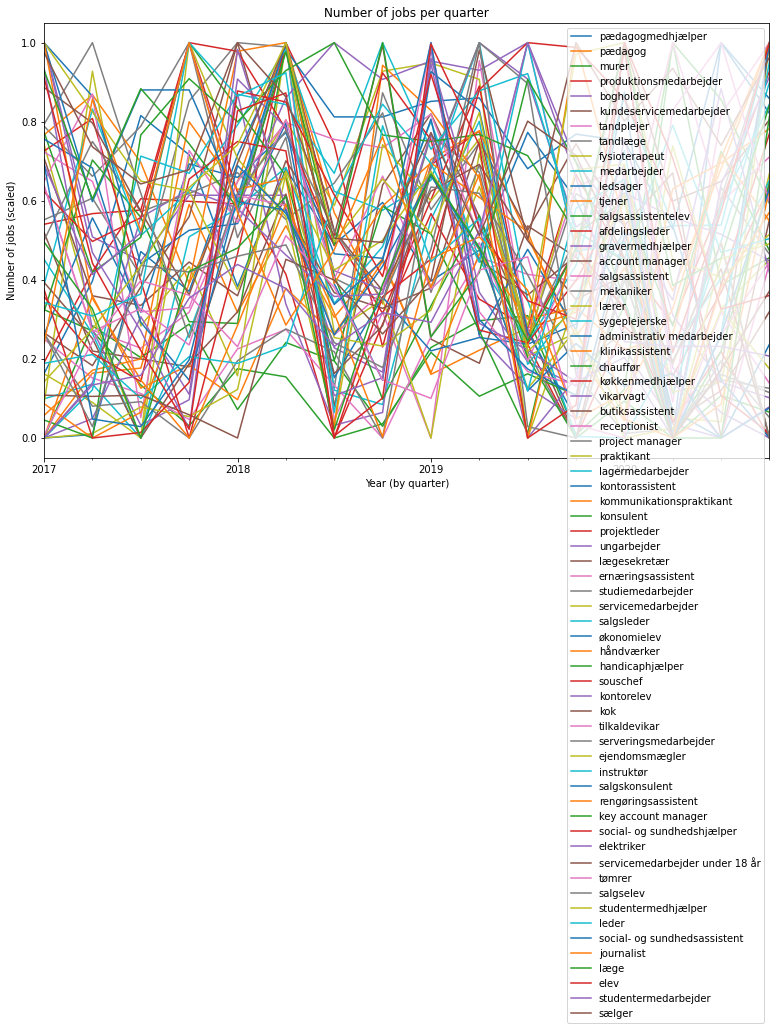

In [14]:
ax = df.plot(figsize=(13,8))

ax.set_xlabel('Year (by quarter)')
ax.set_ylabel('Number of jobs (scaled)')
ax.set_title('Number of jobs per quarter')
ax.grid(False)



In [15]:
ax.get_figure().savefig('test.png')

In [16]:
growth = ['Ledsager',
       'Klinikassistent', 'Lægesekretær',
       'Tandplejer',
       'Servicemedarbejder under 18 år', 'Account Manager',
       'Tandlæge',
       'Handicaphjælper', 'Rengøringsassistent', 'lægesekretær',
       'Afdelingsleder', 'Pædagog',
       'sygeplejerske', 'Vikarvagt', 'Chauffør', 'Gravermedhjælper',
       'Administrativ medarbejder', 'Project Manager', 'Tømrer',
       'Social- og sundhedshjælper', 'Studentermedarbejder', 'Murer',
       'Sygeplejerske', 'Rengøringsassistent', 'Ernæringsassistent',
       'Konsulent', 'Sælger', 'Medarbejder', 'Projektleder',
       'Kommunikationspraktikant', 'Servicemedarbejder',
       'Pædagogmedhjælper', 'Produktionsmedarbejder',
       'Social- og sundhedsassistent', 'Bogholder', 'Lærer',
       'Key Account Manager', 'Køkkenmedhjælper', 'Kontorassistent',
       'Fysioterapeut', 'Elev', 'Elektriker', 'Tjener',
       'Kundeservicemedarbejder', 'Ungarbejder']

decline = [
    'Studiemedarbejder',
      'Salgsassistentelev', 'Instruktør',
       'Salgsleder',
       'Salgselev', 'Souschef', 'Butiksassistent', 'Salgsassistent',
       'Serveringsmedarbejder', 'Kok', 'Økonomielev', 'Kontorelev',
       'Lagermedarbejder', 'Studentermedhjælper', 'Tilkaldevikar',
       'Leder', 'Salgskonsulent', 'Receptionist', 'Praktikant',
       'Mekaniker', 'Ungarbejder', 'Kundeservicemedarbejder', 'Tjener',
       'Elektriker', 'Elev', 'Fysioterapeut', 'Kontorassistent',
       'Køkkenmedhjælper', 'Key Account Manager', 'Lærer', 'Bogholder',
       'Social- og sundhedsassistent', 'Produktionsmedarbejder',
       'Pædagogmedhjælper', 
       'Kommunikationspraktikant', 'Projektleder', 
       'Sælger', 'Ernæringsassistent', 'Rengøringsassistent',
       'Sygeplejerske', 'Murer', 'Studentermedarbejder']


total = growth + decline + ['Sygeplejerske','Kok','Ejendomsmægler','Elektriker','Journalist','Læge','Håndværker']
print(len(total))

print(list(set(total)))


# print(list(dict.fromkeys(growth + decline))

94
['Sygeplejerske', 'Afdelingsleder', 'Køkkenmedhjælper', 'Servicemedarbejder', 'Elev', 'Ejendomsmægler', 'Salgsassistentelev', 'Murer', 'Mekaniker', 'Pædagog', 'Produktionsmedarbejder', 'Ernæringsassistent', 'Konsulent', 'Tjener', 'Salgsassistent', 'Kontorelev', 'Studentermedhjælper', 'Servicemedarbejder under 18 år', 'Ungarbejder', 'Vikarvagt', 'Tømrer', 'Læge', 'Kundeservicemedarbejder', 'Account Manager', 'Lagermedarbejder', 'Pædagogmedhjælper', 'Project Manager', 'Rengøringsassistent', 'Instruktør', 'Ledsager', 'Tandplejer', 'Klinikassistent', 'sygeplejerske', 'Administrativ medarbejder', 'Medarbejder', 'Sælger', 'Studiemedarbejder', 'Tilkaldevikar', 'Souschef', 'Journalist', 'Key Account Manager', 'Studentermedarbejder', 'Kok', 'Håndværker', 'Butiksassistent', 'Social- og sundhedshjælper', 'Leder', 'Praktikant', 'Lægesekretær', 'lægesekretær', 'Tandlæge', 'Salgsleder', 'Handicaphjælper', 'Serveringsmedarbejder', 'Social- og sundhedsassistent', 'Receptionist', 'Elektriker', 'Fysi

In [17]:
import seaborn as sns

df.index = df.index.strftime('%Y-%m-%d')

In [23]:
df.transpose()

date,2017-03-31,2017-06-30,2017-09-30,2017-12-31,2018-03-31,2018-06-30,2018-09-30,2018-12-31,2019-03-31,2019-06-30,2019-09-30,2019-12-31,2020-03-31,2020-06-30,2020-09-30,2020-12-31
pædagogmedhjælper,0.163121,0.397163,0.815603,0.716312,0.382979,0.680851,0.489362,0.595745,0.397163,0.475177,0.773050,0.602837,0.340426,0.000000,1.000000,0.858156
pædagog,0.000000,0.164155,0.176844,0.590801,0.317209,0.536875,0.305313,0.453608,0.160983,0.222046,0.278351,0.318002,0.644726,0.371927,0.681205,1.000000
murer,0.000000,0.283898,0.203390,0.288136,0.072034,0.241525,0.194915,0.029661,0.228814,0.296610,0.309322,0.008475,0.122881,1.000000,0.855932,0.593220
produktionsmedarbejder,0.190789,0.421053,0.605263,0.598684,0.592105,1.000000,0.743421,0.230263,0.690789,0.776316,0.236842,0.000000,0.282895,0.157895,0.368421,0.638158
bogholder,1.000000,0.508772,0.447368,0.614035,0.614035,0.614035,0.228070,0.166667,0.947368,0.368421,0.192982,0.131579,0.228070,0.035088,0.000000,0.078947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
journalist,0.238095,0.857143,0.523810,1.000000,0.571429,0.285714,0.476190,0.761905,0.380952,0.666667,0.000000,0.523810,0.047619,0.000000,0.380952,0.571429
læge,0.495770,0.326565,0.000000,0.421320,0.480541,0.610829,0.020305,0.389171,0.668359,0.482234,0.245347,0.478849,1.000000,0.385787,0.455161,0.842640
elev,0.911150,0.442509,0.221254,0.022648,0.827526,0.872822,0.005226,0.101045,0.996516,0.740418,0.000000,0.083624,1.000000,0.707317,0.325784,0.360627
studentermedarbejder,0.000000,0.134146,0.158537,0.353659,0.439024,0.378049,0.231707,0.317073,0.292683,0.524390,1.000000,0.658537,0.243902,0.231707,0.231707,0.207317


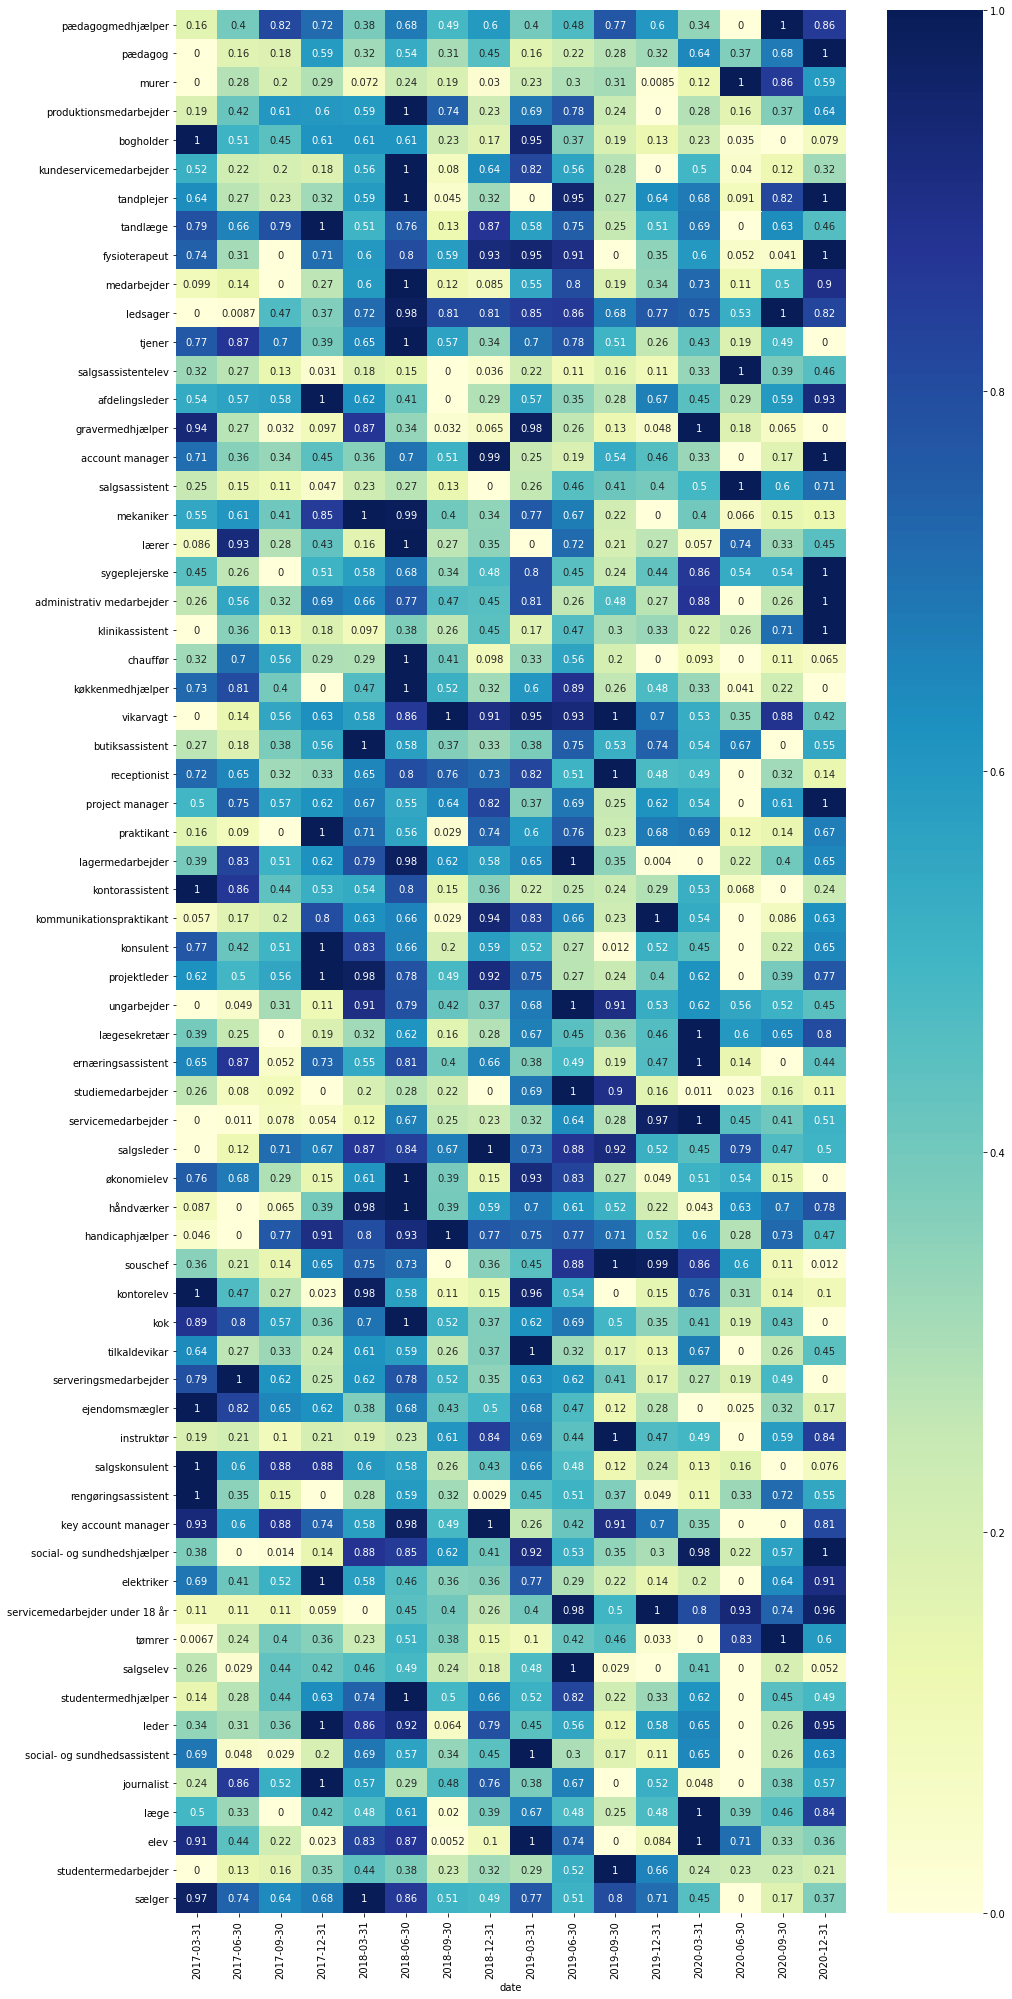

In [46]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,35))     

sns.heatmap(data=df.transpose(), annot=True, cmap="YlGnBu")

ax.get_figure().savefig('test2.png')

In [47]:
df.transpose().sort_values(by=['2020-12-31', '2020-09-30', '2020-06-30', '2020-03-31']).to_csv('exported.csv')